In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import torch.nn.init as init

random.seed(42)
torch.manual_seed(42)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])



In [2]:
# Download and load the training and test sets
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for batching the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

In [11]:
for batches, images in trainloader:
    print(batches.view(128, -1).mean(1,keepdim=True))
    print(images.shape)
    break

tensor([[-0.6795],
        [-0.7274],
        [-0.7503],
        [-0.5828],
        [-0.9010],
        [-0.5957],
        [-0.8206],
        [-0.7345],
        [-0.7764],
        [-0.6936],
        [-0.7567],
        [-0.6417],
        [-0.7193],
        [-0.8365],
        [-0.6733],
        [-0.8073],
        [-0.6327],
        [-0.8062],
        [-0.7812],
        [-0.5953],
        [-0.6956],
        [-0.8675],
        [-0.7459],
        [-0.7307],
        [-0.6882],
        [-0.7270],
        [-0.7489],
        [-0.8384],
        [-0.8071],
        [-0.8147],
        [-0.8496],
        [-0.6396],
        [-0.5727],
        [-0.6368],
        [-0.8447],
        [-0.6879],
        [-0.8294],
        [-0.7231],
        [-0.6169],
        [-0.7107],
        [-0.7561],
        [-0.6173],
        [-0.5702],
        [-0.7672],
        [-0.8443],
        [-0.6938],
        [-0.8402],
        [-0.6283],
        [-0.7155],
        [-0.7731],
        [-0.7253],
        [-0.8855],
        [-0.

In [ ]:
x_1=0
x_2 =0
x_3=0

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Tanh()  

        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x_1 = x
        x = self.fc2(x)
        x_2 = x
        x= self.fc3(x)
        x_3 = x
        return x


In [ ]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs = 1
losses = []
for epoch in range(epochs):
    model.train()
    total = 0
    correct = 0
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad() 
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        total += images.shape[0]
        correct += (torch.argmax(output,dim=1)==labels).sum()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')
    print(f'Accuracy = {(correct/total)*100}')
    losses.append(running_loss/len(trainloader)) 
    break
    

In [114]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import torch.nn.init as init

random.seed(42)
torch.manual_seed(42)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 10)  # Fixed the dimension mismatch
        
        # Initialize weights using Xavier/Glorot initialization
        init.xavier_uniform_(self.fc1.weight,gain=1)
        init.xavier_uniform_(self.fc3.weight)
        
    def forward(self, x):
        self.activations = {}  # Store activations at each layer
        
        x = self.flatten(x)
        self.activations['input'] = x
        
        x = self.fc1(x)
        self.activations['fc1'] = x
        
        x = self.fc2(x)
        self.activations['fc2'] = x
        
        x = self.fc3(x)
        self.activations['fc3'] = x
        
        return x

def analyze_layer_statistics(model, images):
    """Analyze mean and variance at each layer"""
    output = model(images)
    
    stats = {}
    for layer_name, activations in model.activations.items():
        stats[layer_name] = {
            'mean': torch.mean(activations).item(),
            'var': torch.var(activations).item(),
            'min': torch.min(activations).item(),
            'max': torch.max(activations).item()
        }
    
    return stats

# Create model and get a batch of data
model = SimpleNN()
images, _ = next(iter(trainloader))

# Analyze statistics before training
stats = analyze_layer_statistics(model, images)

# Print statistics
print("\nLayer Statistics Analysis:")
print("-" * 50)
for layer_name, layer_stats in stats.items():
    print(f"\n{layer_name} layer:")
    for stat_name, value in layer_stats.items():
        print(f"{stat_name}: {value:.6f}")


Layer Statistics Analysis:
--------------------------------------------------

input layer:
mean: -0.012586
var: 0.969288
min: -0.424213
max: 2.821487

fc1 layer:
mean: -0.018136
var: 1.423586
min: -6.484151
max: 5.996514

fc2 layer:
mean: -0.007757
var: 0.450601
min: -0.999995
max: 0.999988

fc3 layer:
mean: -0.330184
var: 0.817783
min: -3.310901
max: 3.213920


In [19]:
len(trainset)

60000

In [23]:
import torch
from torchvision import datasets, transforms

# Load the dataset with only ToTensor() (no normalization yet)
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=False)

# Accumulate sum and squared sum for mean and variance calculation
mean = 0.0
squared_sum = 0.0
num_samples = 0

for images, _ in trainloader:
    batch_samples = images.size(0)  # Number of images in the batch
    num_samples += batch_samples
    images = images.view(batch_samples, -1)  # Flatten the images to compute per-pixel stats
    
    mean += images.mean(dim=1).sum()  # Sum of means for this batch
    squared_sum += (images ** 2).mean(dim=1).sum()  # Sum of squared values for this batch

# Compute the final mean and variance
mean /= num_samples
var = (squared_sum / num_samples) - (mean ** 2)

print(f"Calculated Mean: {mean:.6f}")
print(f"Calculated Variance: {var:.6f}")


Calculated Mean: 0.130660
Calculated Variance: 0.094930


In [24]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def calculate_normalization_stats(dataset_class, root='./data', **dataset_kwargs):
    """
    Calculate the mean and std of a dataset for normalization.
    
    Args:
        dataset_class: The dataset class (e.g., datasets.MNIST)
        root: Root directory for dataset
        **dataset_kwargs: Additional arguments for dataset
        
    Returns:
        tuple: (mean, std) of the dataset
    """
    # Load dataset with only ToTensor transform initially
    initial_transform = transforms.Compose([transforms.ToTensor()])
    dataset = dataset_class(root=root, train=True, download=True, 
                          transform=initial_transform, **dataset_kwargs)
    loader = DataLoader(dataset, batch_size=1000, num_workers=2)
    
    nimages = 0
    mean = 0.
    var = 0.
    
    # Calculate mean
    for batch, _ in loader:
        # Rearrange batch to be the shape of [B, C, W * H]
        batch = batch.view(batch.size(0), batch.size(1), -1)
        nimages += batch.size(0)
        
        # Update mean
        mean += batch.mean(2).sum(0) 
    
    mean /= nimages
    
    # Calculate variance
    for batch, _ in loader:
        batch = batch.view(batch.size(0), batch.size(1), -1)
        var += ((batch - mean.unsqueeze(1).unsqueeze(2))**2).sum([0,2])
    
    std = torch.sqrt(var / (nimages * batch.size(2)))
    
    return mean.numpy(), std.numpy()

# Calculate stats for MNIST
mean, std = calculate_normalization_stats(datasets.MNIST)

print(f"Dataset statistics:")
print(f"Mean: {mean[0]:.4f}")
print(f"Std:  {std[0]:.4f}")

# Now you can create a transform with these values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean[0],), (std[0],))
])

# Verify the normalization
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1000)

# Check statistics after normalization
batch, _ = next(iter(loader))
print("\nAfter normalization:")
print(f"Mean: {batch.mean():.4f}")
print(f"Std:  {batch.std():.4f}")

Dataset statistics:
Mean: 0.1307
Std:  0.3081

After normalization:
Mean: -0.0079
Std:  0.9904


In [100]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Create a small dataset (2 features, 4 samples)
num_points = 100  # Number of data points

num_features = 28 * 28     # Number of features



# Randomly generate data points

# For generality, use values sampled from a uniform distribution between 0 and 10

X = np.random.uniform(0, 10, size=(num_points, num_features))


  
scalar = StandardScaler()
X = scalar.fit_transform(X)



In [101]:
X.mean(),X.std(),X

(1.2688263138573217e-17,
 1.0,
 array([[ 0.51459868, -0.05369564,  1.55959884, ...,  0.56548788,
          1.10956482,  0.64754112],
        [-0.99962407,  1.46620393, -1.10932716, ...,  0.3163979 ,
          1.05531368,  0.78429994],
        [ 0.18258542,  0.51780768, -0.24688498, ..., -1.01904053,
         -0.06018188, -1.05716552],
        ...,
        [-0.29534408,  1.39244791, -0.93568659, ..., -0.26154742,
         -0.60317134,  0.17969745],
        [ 0.39737484, -0.12905242, -0.15637631, ...,  1.18319085,
         -1.27346938,  1.54408932],
        [-0.6447867 , -0.10099625, -0.58289847, ...,  0.47114734,
         -1.82503895,  1.25656632]]))

In [109]:
# Xavier Initialization Function
def xavier_initialization(input_dim, output_dim):
    """
    Initializes weights using Xavier initialization.
    Args:
        input_dim (int): Number of input features.
        output_dim (int): Number of output features.
    Returns:
        np.ndarray: Initialized weights matrix.
    """
    std = np.sqrt(2 / (input_dim + output_dim))
    return np.random.normal(0, std, size = (output_dim, input_dim))

# Initialize weights with Xavier initialization
input_dim = X.shape[1]  # 2 (number of features)
output_dim = 3          # Arbitrary, 3 output neurons
W = xavier_initialization(input_dim, output_dim)

# Compute Y = W @ X.T
Y = W @ X.T
Y_tanh = np.tanh(Y)

# Output
print("Dataset (X):")
print(X)
print("\nWeights (W):")
print(W)
print("\nResult (Y):")
print(Y)
print("\nResult after applying tanh (Y_tanh):")
print(Y_tanh)
# Output
print("Dataset (X):")
print(X)
print("\nWeights (W):")
print(W)
print("\nResult (Y):")
print(Y)


Dataset (X):
[[ 0.51459868 -0.05369564  1.55959884 ...  0.56548788  1.10956482
   0.64754112]
 [-0.99962407  1.46620393 -1.10932716 ...  0.3163979   1.05531368
   0.78429994]
 [ 0.18258542  0.51780768 -0.24688498 ... -1.01904053 -0.06018188
  -1.05716552]
 ...
 [-0.29534408  1.39244791 -0.93568659 ... -0.26154742 -0.60317134
   0.17969745]
 [ 0.39737484 -0.12905242 -0.15637631 ...  1.18319085 -1.27346938
   1.54408932]
 [-0.6447867  -0.10099625 -0.58289847 ...  0.47114734 -1.82503895
   1.25656632]]

Weights (W):
[[ 0.0703285  -0.09207616  0.00046712 ...  0.02878498  0.0114036
   0.02639193]
 [ 0.05616378 -0.00774921 -0.01831405 ... -0.01155112  0.04080291
  -0.06469014]
 [-0.11917771 -0.03050455 -0.12201427 ... -0.00902066 -0.0402458
  -0.04474773]]

Result (Y):
[[-1.53217963 -1.18965792  0.41765409  1.67432202  0.99370468 -1.55805065
   0.37785387  1.77745934  0.699951    0.24318296  3.93546067  1.2611915
   1.62419509  0.7833101   0.06650761 -0.28537647  1.51216743 -0.17199809
  -1.

In [110]:
Y.mean(),Y.std(),Y_tanh.mean(),Y_tanh.std()

(-2.3684757858670006e-16,
 1.3553527641383567,
 -0.005344922023346962,
 0.7124418287348369)

In [111]:
W.mean(),2*W.std()**2

(0.0007147019799603141, 0.005089017674485319)

In [66]:
import numpy as np

def glorot_normal(fan_in, fan_out, gain=1.0):
    std = gain * np.sqrt(2.0 / (fan_in + fan_out))
    return np.random.normal(0, std, size=(fan_in, fan_out))

# Example usage
fan_in = 128
fan_out = 64
weights = glorot_normal(fan_in, fan_out)
print(weights)


[[-0.00249115  0.09699207 -0.018032   ... -0.14983046 -0.14472735
  -0.04509705]
 [ 0.04499795  0.04241577  0.08155452 ... -0.12840334 -0.06034991
   0.0025271 ]
 [-0.02916729 -0.13338675  0.24451018 ...  0.09099708  0.05159747
  -0.24490353]
 ...
 [-0.14753845  0.02598074  0.03149147 ... -0.03177622 -0.01333582
  -0.04212599]
 [ 0.17140791 -0.27036593  0.08019689 ... -0.01189096  0.09493685
   0.00241299]
 [-0.12766068 -0.00202925  0.02562901 ... -0.0325587  -0.11338704
   0.08776577]]


In [88]:
weights.mean(),128*weights.std()**2

(0.00028515810775374753, 1.330856200831036)

In [94]:
28 * 28*489.0372009277344**2

187499388.97072685

Epoch 1/5, Loss: 0.3140
Accuracy: 90.71%

Layer Statistics Analysis:
Linear(in_features=256, out_features=10, bias=True)
(tensor([[ 9.8999e-07,  1.6689e-08,  1.0875e-06,  1.4777e-07, -7.4708e-04,
          3.3184e-07,  1.5955e-05,  9.1725e-05,  1.6933e-05,  6.1990e-04],
        [ 7.0882e-09,  1.2783e-06,  4.6241e-05, -1.9321e-04,  7.1497e-07,
          4.3170e-06,  2.7438e-07,  9.6850e-06,  1.2383e-04,  6.8701e-06],
        [ 5.0292e-07,  5.4804e-05, -9.6169e-03,  5.9401e-04,  7.4253e-07,
          5.8818e-06,  9.2242e-07,  1.5147e-03,  6.7079e-03,  7.3749e-04],
        [ 2.1388e-06,  3.1482e-07,  2.5090e-07,  1.8435e-04,  2.4260e-08,
         -2.4042e-04,  5.5982e-09,  3.9774e-07,  4.8862e-05,  4.0689e-06],
        [-7.1893e-04,  1.5011e-07,  3.6959e-07,  1.8420e-05,  1.1493e-08,
          6.6980e-04,  7.9445e-08,  1.4780e-08,  2.9882e-05,  1.9834e-07],
        [ 6.8374e-08,  4.5444e-05,  2.0103e-05,  3.9389e-05,  6.8328e-04,
          4.4831e-05,  2.9836e-05,  2.5608e-03,  7.2237e-05

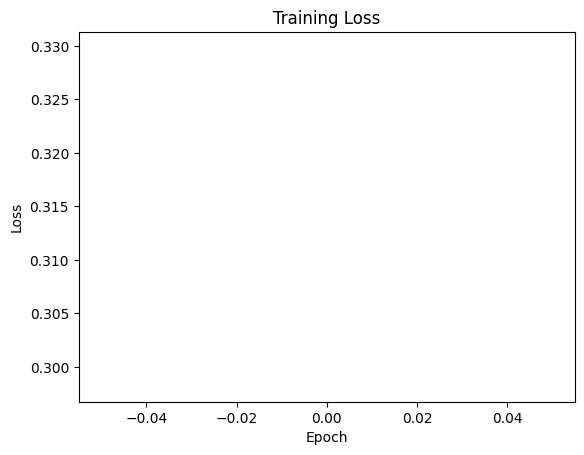

In [124]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import random
import torch.nn.init as init

# Set random seeds for reproducibility
random.seed(42)
torch.manual_seed(42)

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Define the Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 10)
        
        # Xavier initialization
        init.xavier_uniform_(self.fc1.weight, gain=1)
        init.xavier_uniform_(self.fc3.weight)

        # To store activations and gradients
        self.activations = {}
        self.gradients = {}

    def forward(self, x):
        x = self.flatten(x)
        self.activations['input'] = x  # Store activations
        x = self.fc1(x)
        self.activations['fc1'] = x
        x = self.fc2(x)
        self.activations['fc2'] = x
        x = self.fc3(x)
        self.activations['fc3'] = x
        return x

    def register_hooks(self):
        """Register hooks for activation and gradient tracking"""
        def forward_hook(module, input, output):
            self.activations[module] = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients[module] = grad_output

        for layer in [self.fc1, self.fc2, self.fc3]:
            layer.register_forward_hook(forward_hook)
            layer.register_backward_hook(backward_hook)

# Function to analyze activations at each layer
def analyze_layer_statistics(model, images):
    model(images)  # Forward pass
    stats = {}
    for layer_name, activations in model.activations.items():
        stats[layer_name] = {
            'mean': torch.mean(activations).item(),
            'var': torch.var(activations).item(),
            'min': torch.min(activations).item(),
            'max': torch.max(activations).item()
        }

    for layer_name, activations in model.gradients.items():
        print(layer_name)
        print(activations)
        print(torch.mean(activations[0]).item())
        print(torch.var(activations[0]).item())
        print(torch.min(activations[0]).item())
        print(torch.max(activations[0]).item())
        #print(activations.shape)
        print('_______')
    return stats

# Initialize model, optimizer, and loss function
model = SimpleNN()
model.register_hooks()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
epochs = 5
losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()  # Zero the gradients
        output = model(images)  # Forward pass
        loss = criterion(output, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        total += images.size(0)
        correct += (torch.argmax(output, dim=1) == labels).sum().item()
    
    # Epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}")
    print(f"Accuracy: {100 * correct / total:.2f}%")
    losses.append(running_loss / len(trainloader))
    
    # Analyze and display layer statistics
    print("\nLayer Statistics Analysis:")
    stats = analyze_layer_statistics(model, images)
    for layer_name, layer_stats in stats.items():
        print(f"\n{layer_name} layer:")
        for stat_name, value in layer_stats.items():
            print(f"{stat_name}: {value:.6f}")
    print("-" * 50)
    break
# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()
